In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import metrics

2025-03-23 12:14:46.717438: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-23 12:14:46.726775: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742712286.740263    7931 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742712286.743533    7931 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-23 12:14:46.755318: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
img_height,img_width=256,256
batch_size=8

In [3]:
directory = '/home/axernox/Project_2/Lungs_Cropped/train'
train = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(img_height,img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 3805 files belonging to 2 classes.


I0000 00:00:1742712978.011860    7931 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1753 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [4]:
directoryval = '/home/axernox/Project_2/Lungs_Cropped/val'
val = tf.keras.utils.image_dataset_from_directory(
    directoryval,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(img_height,img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 815 files belonging to 2 classes.


In [5]:
directorytest = '/home/axernox/Project_2/Lungs_Cropped/test'
test = tf.keras.utils.image_dataset_from_directory(
    directorytest,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(img_height,img_width),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 804 files belonging to 2 classes.


In [6]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[256, 256, 3]),
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=128, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=256, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=512, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.25), # To avoid overfitting 
    Flatten(),
    Dense(units=1500, activation='relu'),
    Dropout(0.4), # To avoid overfitting 
    Dense(units=2, activation='softmax')
])


/home/axernox/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 254, 254, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 127, 127, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 125, 125, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │    27,649,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,365,651 (123.47 MB)

 Trainable params: 32,365,651 (123.47 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
train_his = model.fit(x=train, validation_data=val, epochs=15, batch_size=8)

Epoch 1/15


I0000 00:00:1739851192.651189   20889 service.cc:148] XLA service 0x7fecf80155b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739851192.651294   20889 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2025-02-18 09:29:52.802898: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1739851193.173499   20889 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1739851203.598505   20889 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.7108 - loss: 0.7925

2025-02-18 09:30:35.075674: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_176', 76 bytes spill stores, 76 bytes spill loads

2025-02-18 09:30:40.603240: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_176', 76 bytes spill stores, 76 bytes spill loads



352/352 ━━━━━━━━━━━━━━━━━━━━ 52s 110ms/step - accuracy: 0.7108 - loss: 0.7921 - val_accuracy: 0.7259 - val_loss: 0.5793
Epoch 2/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 26s 74ms/step - accuracy: 0.7220 - loss: 0.6000 - val_accuracy: 0.7259 - val_loss: 0.5803
Epoch 3/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 30s 85ms/step - accuracy: 0.7222 - loss: 0.5766 - val_accuracy: 0.7259 - val_loss: 0.5771
Epoch 4/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 23s 65ms/step - accuracy: 0.7202 - loss: 0.5718 - val_accuracy: 0.7259 - val_loss: 0.5690
Epoch 5/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 26s 73ms/step - accuracy: 0.7207 - loss: 0.5508 - val_accuracy: 0.7292 - val_loss: 0.5700
Epoch 6/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 26s 74ms/step - accuracy: 0.7230 - loss: 0.5437 - val_accuracy: 0.7392 - val_loss: 0.5643
Epoch 7/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 26s 74ms/step - accuracy: 0.7273 - loss: 0.5367 - val_accuracy: 0.7309 - val_loss: 0.5531
Epoch 8/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 24s 67ms/step - accuracy: 0.7233 - loss: 0.5345 - val_accura

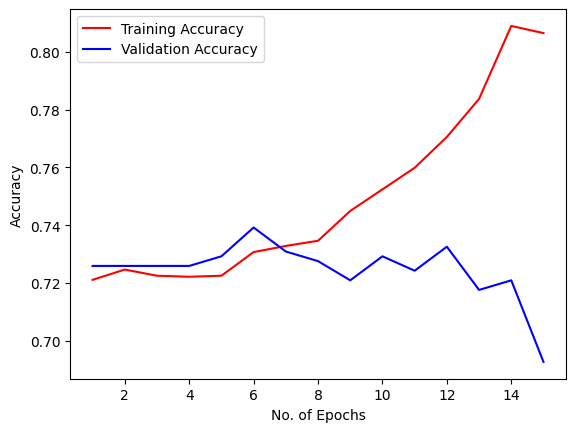

In [11]:
epochs = [i for i in range(1,16)]
plt.plot(epochs,train_his.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,train_his.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
classname = val.class_names
classname


['Resistive', 'Sensitive']

In [ ]:
pred = model.predict(test)
pred_cat = tf.argmax(pred, axis=1)
true_cat = tf.concat([y for x,y in test], axis=0)
y_true = tf.argmax(true_cat, axis=1)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, pred_cat, target_names=classname))

              precision    recall  f1-score   support

   Resistive       0.71      0.73      0.72       437
   Sensitive       0.22      0.20      0.21       165

    accuracy                           0.59       602
   macro avg       0.46      0.47      0.46       602
weighted avg       0.57      0.59      0.58       602



<Axes: >

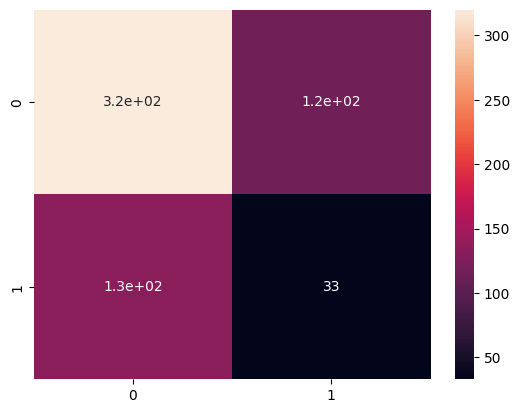

In [19]:
cm = confusion_matrix(y_true, pred_cat)
plt.figure()
sns.heatmap(cm, annot=True)

### Raw Images

In [8]:
history = model.fit(x=train, validation_data=val, epochs=20, batch_size=8)

Epoch 1/20


I0000 00:00:1741626059.312157   30261 service.cc:148] XLA service 0x7f489c016060 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741626059.312913   30261 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2025-03-10 22:30:59.591003: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741626060.030710   30261 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1741626072.878219   30261 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


476/476 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.5528 - loss: 0.8112

2025-03-10 22:32:09.153790: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_176', 76 bytes spill stores, 76 bytes spill loads

2025-03-10 22:32:11.302519: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng15{k5=1,k6=0,k7=1,k10=1} for conv (f32[8,32,254,254]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,32,256,256]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2025-03-10 22:32:11.313578: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.800761201s
Trying algorithm eng15{k5=1,k6=0,k7=1

476/476 ━━━━━━━━━━━━━━━━━━━━ 82s 137ms/step - accuracy: 0.5529 - loss: 0.8110 - val_accuracy: 0.6601 - val_loss: 0.5916
Epoch 2/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 34s 70ms/step - accuracy: 0.6581 - loss: 0.5817 - val_accuracy: 0.6479 - val_loss: 0.5911
Epoch 3/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 34s 70ms/step - accuracy: 0.6682 - loss: 0.5575 - val_accuracy: 0.6871 - val_loss: 0.5726
Epoch 4/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 34s 71ms/step - accuracy: 0.6997 - loss: 0.5437 - val_accuracy: 0.6982 - val_loss: 0.5636
Epoch 5/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 34s 71ms/step - accuracy: 0.7078 - loss: 0.5240 - val_accuracy: 0.6761 - val_loss: 0.5682
Epoch 6/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 34s 71ms/step - accuracy: 0.7206 - loss: 0.5060 - val_accuracy: 0.6957 - val_loss: 0.5603
Epoch 7/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 34s 71ms/step - accuracy: 0.7392 - loss: 0.4881 - val_accuracy: 0.7055 - val_loss: 0.5801
Epoch 8/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 35s 72ms/step - accuracy: 0.7556 - loss: 0.4614 - val_accura

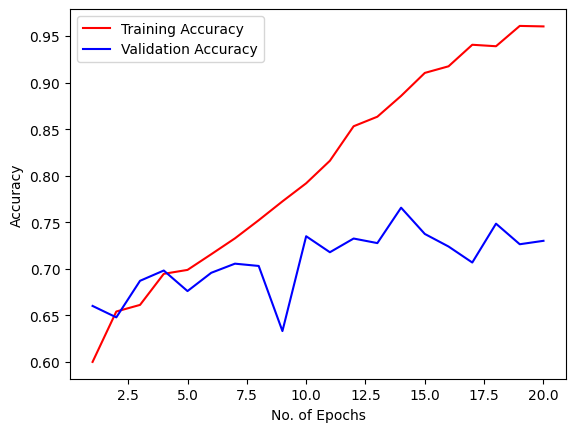

In [11]:
epochs = [i for i in range(1,21)]
plt.plot(epochs,history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
pred = model.predict(test)
pred_cat = tf.argmax(pred, axis=1)
true_cat = tf.concat([y for x,y in test], axis=0)
y_true = tf.argmax(true_cat, axis=1)

 99/101 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

2025-03-10 22:44:01.101563: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_147', 76 bytes spill stores, 76 bytes spill loads



101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step


2025-03-10 22:44:05.758270: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
classname = val.class_names
print(classification_report(y_true, pred_cat, target_names=classname))

              precision    recall  f1-score   support

   Resistive       0.79      0.77      0.78       399
   Sensitive       0.78      0.80      0.79       405

    accuracy                           0.78       804
   macro avg       0.79      0.78      0.78       804
weighted avg       0.78      0.78      0.78       804



<Axes: >

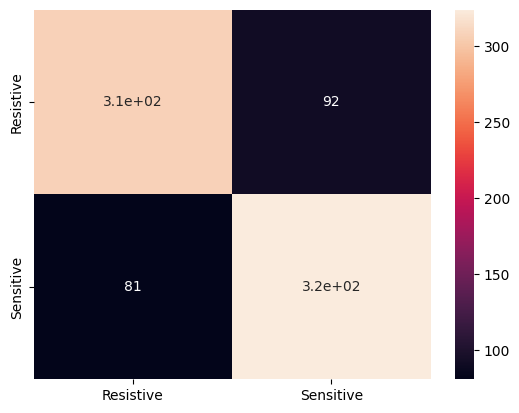

In [15]:
import seaborn as sns
cm = confusion_matrix(y_true, pred_cat,)
plt.figure()
sns.heatmap(cm, annot=True, xticklabels=classname, yticklabels=classname)

### With CLAHE

In [22]:
history = model.fit(x=train, validation_data=val, epochs=20, batch_size=8)

Epoch 1/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 48s 83ms/step - accuracy: 0.5399 - loss: 0.7277 - val_accuracy: 0.6748 - val_loss: 0.5989
Epoch 2/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 87s 183ms/step - accuracy: 0.6468 - loss: 0.6071 - val_accuracy: 0.6847 - val_loss: 0.5896
Epoch 3/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 43s 91ms/step - accuracy: 0.6936 - loss: 0.5614 - val_accuracy: 0.6834 - val_loss: 0.5547
Epoch 4/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 36s 74ms/step - accuracy: 0.7104 - loss: 0.5331 - val_accuracy: 0.7031 - val_loss: 0.6051
Epoch 5/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.7176 - loss: 0.5347 - val_accuracy: 0.7104 - val_loss: 0.5779
Epoch 6/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.7319 - loss: 0.5049 - val_accuracy: 0.7018 - val_loss: 0.6467
Epoch 7/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.7426 - loss: 0.4755 - val_accuracy: 0.7055 - val_loss: 0.6181
Epoch 8/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 36s 75ms/step - accuracy: 0.7662 - loss: 0.4458 -

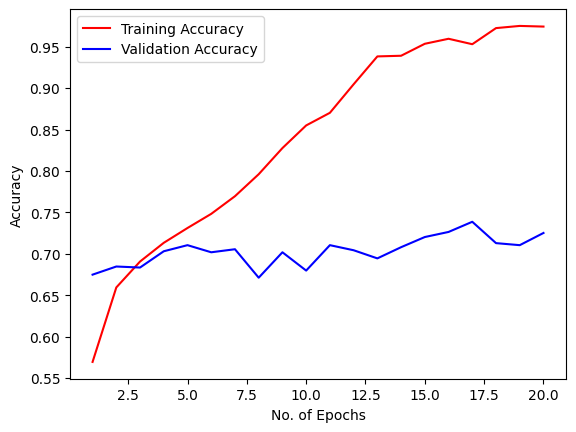

In [23]:
epochs = [i for i in range(1,21)]
plt.plot(epochs,history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
pred = model.predict(test)
pred_cat = tf.argmax(pred, axis=1)
true_cat = tf.concat([y for x,y in test], axis=0)
y_true = tf.argmax(true_cat, axis=1)

101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step


2025-03-10 23:08:08.648357: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [25]:
from sklearn.metrics import classification_report, confusion_matrix
classname = val.class_names
print(classification_report(y_true, pred_cat, target_names=classname))

              precision    recall  f1-score   support

   Resistive       0.71      0.85      0.78       399
   Sensitive       0.82      0.66      0.73       405

    accuracy                           0.75       804
   macro avg       0.77      0.76      0.75       804
weighted avg       0.77      0.75      0.75       804



<Axes: >

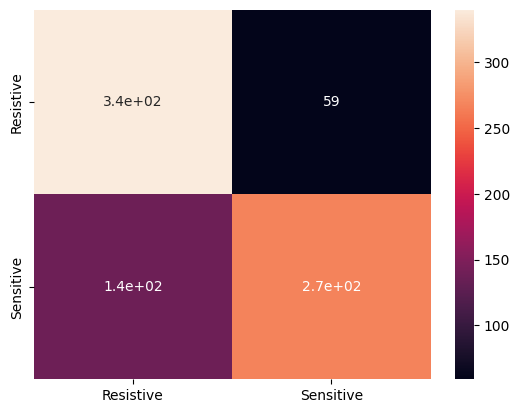

In [26]:
import seaborn as sns
cm = confusion_matrix(y_true, pred_cat,)
plt.figure()
sns.heatmap(cm, annot=True, xticklabels=classname, yticklabels=classname)

### With Gabor

In [9]:
history = model.fit(x=train, validation_data=val, epochs=20, batch_size=8)

Epoch 1/20


I0000 00:00:1741706038.686054    1265 service.cc:148] XLA service 0x7fa3c0004160 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741706038.692215    1265 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2025-03-11 20:43:58.895481: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741706039.211257    1265 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1741706049.297701    1265 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


476/476 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5045 - loss: 1.2284

2025-03-11 20:44:49.014298: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_176', 76 bytes spill stores, 76 bytes spill loads

2025-03-11 20:44:55.273477: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_176', 76 bytes spill stores, 76 bytes spill loads



476/476 ━━━━━━━━━━━━━━━━━━━━ 61s 100ms/step - accuracy: 0.5045 - loss: 1.2275 - val_accuracy: 0.5166 - val_loss: 0.6921
Epoch 2/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.5284 - loss: 0.6903 - val_accuracy: 0.5448 - val_loss: 0.6834
Epoch 3/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 35s 73ms/step - accuracy: 0.5850 - loss: 0.6741 - val_accuracy: 0.6356 - val_loss: 0.6228
Epoch 4/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.6583 - loss: 0.5952 - val_accuracy: 0.6761 - val_loss: 0.5925
Epoch 5/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 34s 71ms/step - accuracy: 0.6775 - loss: 0.5757 - val_accuracy: 0.6945 - val_loss: 0.5879
Epoch 6/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 37s 77ms/step - accuracy: 0.7089 - loss: 0.5519 - val_accuracy: 0.7031 - val_loss: 0.5742
Epoch 7/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.7290 - loss: 0.5209 - val_accuracy: 0.7018 - val_loss: 0.5700
Epoch 8/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 36s 75ms/step - accuracy: 0.7437 - loss: 0.4991 - val_accura

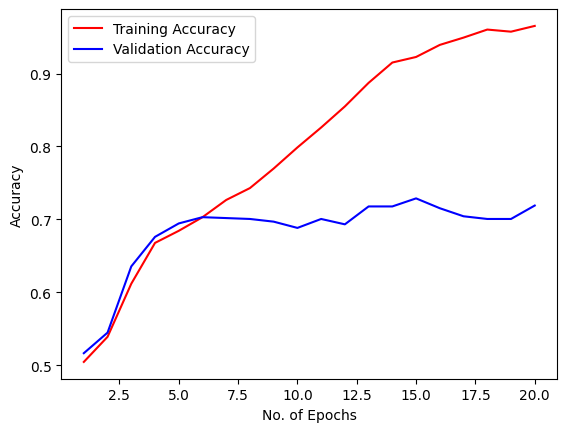

In [10]:
epochs = [i for i in range(1,21)]
plt.plot(epochs,history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
pred = model.predict(test)
pred_cat = tf.argmax(pred, axis=1)
true_cat = tf.concat([y for x,y in test], axis=0)
y_true = tf.argmax(true_cat, axis=1)

 99/101 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

2025-03-11 20:57:06.874546: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_147', 76 bytes spill stores, 76 bytes spill loads



101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step


2025-03-11 20:57:12.727755: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [12]:
from sklearn.metrics import classification_report, confusion_matrix
classname = val.class_names
print(classification_report(y_true, pred_cat, target_names=classname))

              precision    recall  f1-score   support

   Resistive       0.77      0.74      0.75       399
   Sensitive       0.75      0.78      0.77       405

    accuracy                           0.76       804
   macro avg       0.76      0.76      0.76       804
weighted avg       0.76      0.76      0.76       804



<Axes: >

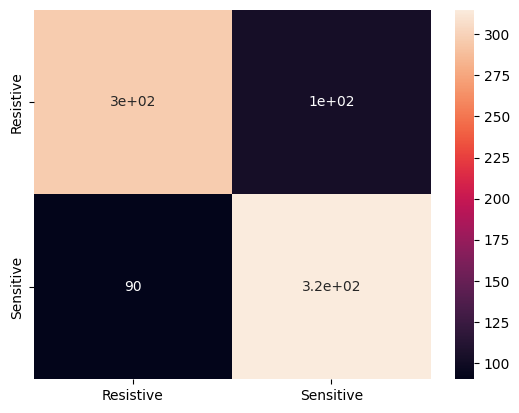

In [13]:
import seaborn as sns
cm = confusion_matrix(y_true, pred_cat,)
plt.figure()
sns.heatmap(cm, annot=True, xticklabels=classname, yticklabels=classname)

### With CANNY

In [18]:
history = model.fit(x=train, validation_data=val, epochs=20, batch_size=8)

Epoch 1/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 45s 83ms/step - accuracy: 0.5389 - loss: 0.9109 - val_accuracy: 0.5988 - val_loss: 0.6649
Epoch 2/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 35s 73ms/step - accuracy: 0.5969 - loss: 0.6655 - val_accuracy: 0.6258 - val_loss: 0.6181
Epoch 3/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.6504 - loss: 0.6133 - val_accuracy: 0.6442 - val_loss: 0.5979
Epoch 4/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 35s 73ms/step - accuracy: 0.6800 - loss: 0.5780 - val_accuracy: 0.6601 - val_loss: 0.6000
Epoch 5/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.7069 - loss: 0.5431 - val_accuracy: 0.6613 - val_loss: 0.6002
Epoch 6/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 36s 74ms/step - accuracy: 0.7372 - loss: 0.5144 - val_accuracy: 0.6638 - val_loss: 0.6301
Epoch 7/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.7703 - loss: 0.4672 - val_accuracy: 0.6687 - val_loss: 0.6816
Epoch 8/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 36s 75ms/step - accuracy: 0.8027 - loss: 0.4165 - 

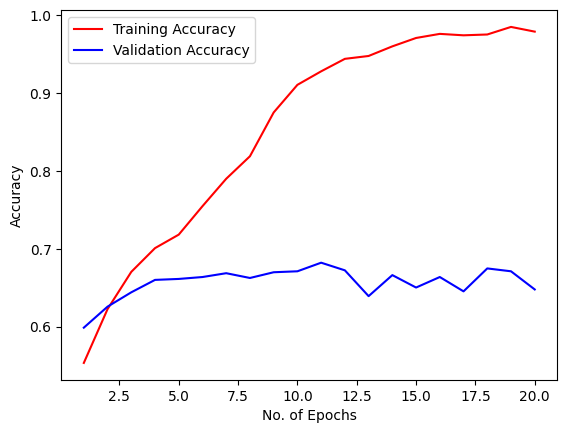

In [19]:
epochs = [i for i in range(1,21)]
plt.plot(epochs,history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
pred = model.predict(test)
pred_cat = tf.argmax(pred, axis=1)
true_cat = tf.concat([y for x,y in test], axis=0)
y_true = tf.argmax(true_cat, axis=1)

101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step


2025-03-11 21:23:20.799138: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [21]:
from sklearn.metrics import classification_report, confusion_matrix
classname = val.class_names
print(classification_report(y_true, pred_cat, target_names=classname))

              precision    recall  f1-score   support

   Resistive       0.50      0.90      0.64       399
   Sensitive       0.52      0.11      0.18       405

    accuracy                           0.50       804
   macro avg       0.51      0.50      0.41       804
weighted avg       0.51      0.50      0.41       804



<Axes: >

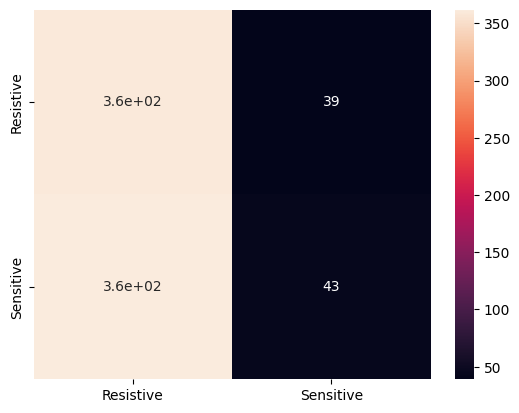

In [22]:
import seaborn as sns
cm = confusion_matrix(y_true, pred_cat,)
plt.figure()
sns.heatmap(cm, annot=True, xticklabels=classname, yticklabels=classname)

### Lungs Cropped On CLAHE

In [9]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
  train,
  validation_data=val,
  epochs=20,
  batch_size=8,
  #callbacks=[early_stopping]
)

Epoch 1/20


I0000 00:00:1742713027.193224   10802 service.cc:148] XLA service 0x7f3ce0016d50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742713027.193258   10802 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2025-03-23 12:27:07.235439: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1742713027.498153   10802 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-23 12:27:15.818331: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng20{k2=1,k3=0} for conv (f32[32,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,32,256,256]{3,2,1,0}, f32[8,32,254,254]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_sc

476/476 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.4986 - loss: 0.9526

2025-03-23 12:28:00.554047: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_175', 76 bytes spill stores, 76 bytes spill loads

2025-03-23 12:28:05.079766: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_175', 76 bytes spill stores, 76 bytes spill loads



476/476 ━━━━━━━━━━━━━━━━━━━━ 62s 99ms/step - accuracy: 0.4986 - loss: 0.9522 - val_accuracy: 0.5067 - val_loss: 0.6918
Epoch 2/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.5111 - loss: 0.6942 - val_accuracy: 0.5018 - val_loss: 0.6929
Epoch 3/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 35s 73ms/step - accuracy: 0.5143 - loss: 0.6935 - val_accuracy: 0.5288 - val_loss: 0.6926
Epoch 4/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.5050 - loss: 0.6931 - val_accuracy: 0.5129 - val_loss: 0.6834
Epoch 5/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.5323 - loss: 0.6875 - val_accuracy: 0.5166 - val_loss: 0.6835
Epoch 6/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 36s 75ms/step - accuracy: 0.5525 - loss: 0.6773 - val_accuracy: 0.5583 - val_loss: 0.6727
Epoch 7/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 35s 73ms/step - accuracy: 0.5855 - loss: 0.6621 - val_accuracy: 0.5571 - val_loss: 0.6654
Epoch 8/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 37s 77ms/step - accuracy: 0.6016 - loss: 0.6508 - val_accurac

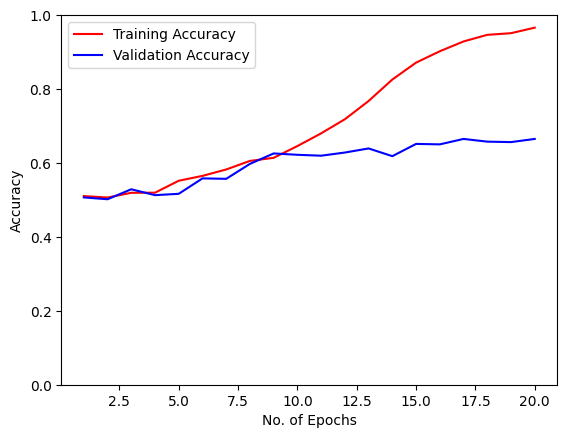

In [10]:
epochs = [i for i in range(1,21)]
plt.plot(epochs,history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.ylim((0,1))
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
pred = model.predict(test)
pred_cat = tf.argmax(pred, axis=1)
true_cat = tf.concat([y for x,y in test], axis=0)
y_true = tf.argmax(true_cat, axis=1)

 98/101 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

2025-03-23 12:41:28.467040: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_147', 76 bytes spill stores, 76 bytes spill loads



101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step


2025-03-23 12:41:29.899460: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [14]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, pred_cat, target_names=classname))

              precision    recall  f1-score   support

   Resistive       0.69      0.62      0.65       399
   Sensitive       0.66      0.73      0.69       405

    accuracy                           0.67       804
   macro avg       0.68      0.67      0.67       804
weighted avg       0.68      0.67      0.67       804



<Axes: >

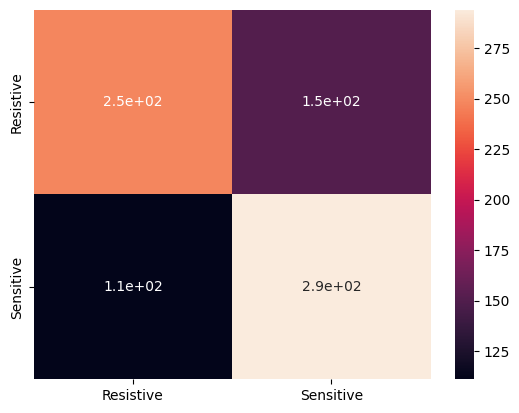

In [15]:
import seaborn as sns
cm = confusion_matrix(y_true, pred_cat,)
plt.figure()
sns.heatmap(cm, annot=True, xticklabels=classname, yticklabels=classname)